Saving strawberries.tif to strawberries.tif


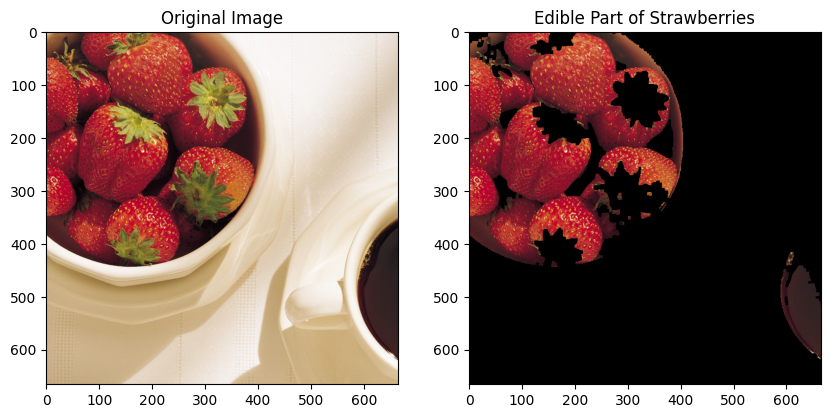

In [11]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image file
uploaded = files.upload()

# Assuming the file is named 'strawberries.tif'
image_path = next(iter(uploaded))

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image '{image_path}'")
else:
    # Check if image needs to be converted from RGBA to RGB
    if len(image.shape) == 3 and image.shape[2] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
    elif len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the color range for strawberries (red color)
    lower_red1 = np.array([0, 70, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 70, 50])
    upper_red2 = np.array([180, 255, 255])

    # Create masks to detect red color
    mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Morphological operations to remove small noises
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Extract the edible part of strawberries from the original image
    edible_part = cv2.bitwise_and(image, image, mask=mask)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title("Edible Part of Strawberries")
    plt.imshow(cv2.cvtColor(edible_part, cv2.COLOR_BGR2RGB))

    plt.show()


Saving polygon.png to polygon.png


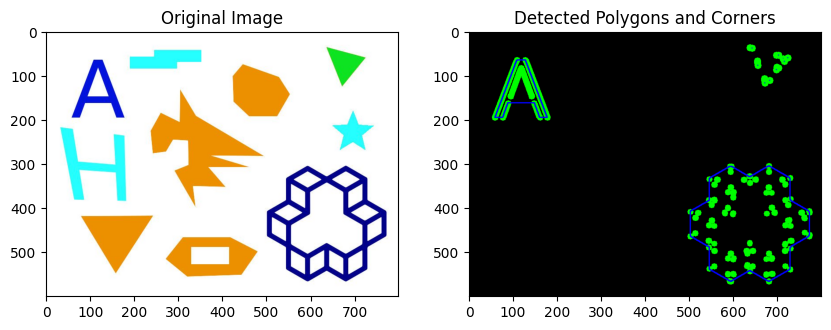

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image file
uploaded = files.upload()

# Assuming the file is named 'polygon.png'
image_path = next(iter(uploaded))

# Load the image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find connected components
num_labels, labels = cv2.connectedComponents(binary)

# Prepare an empty image to draw the detected polygons
output_image = np.zeros_like(image)

# Parameters for the Harris corner detector
block_size = 2
aperture_size = 3
k = 0.04
threshold = 0.01

# Loop through each detected component (skip the background component 0)
for label in range(1, num_labels):
    # Create a mask for the current component
    component_mask = (labels == label).astype(np.uint8) * 255

    # Find corners using the Harris corner detector
    corners = cv2.cornerHarris(component_mask, block_size, aperture_size, k)

    # Dilate corner image to enhance corner points
    corners = cv2.dilate(corners, None)

    # Threshold for an optimal value
    corner_mask = corners > threshold * corners.max()

    # Find coordinates of the corners
    corner_coords = np.argwhere(corner_mask)

    # Draw detected corners and polygons on the output image
    for coord in corner_coords:
        y, x = coord
        cv2.circle(output_image, (x, y), 5, (0, 255, 0), -1)

    # Draw the polygon boundary
    contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(output_image, contours, -1, (255, 0, 0), 2)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Detected Polygons and Corners")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

plt.show()
